In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
iphone = pd.read_json('reddit_iphone.json')  
samsung = pd.read_json('reddit_samsung.json')
xiaomi = pd.read_json('reddit_xiaomi.json')
oneplus = pd.read_json('reddit_oneplus.json')

In [3]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [4]:
iphone['sentiment'] = iphone['Text'].apply(get_sentiment)
samsung['sentiment'] = samsung['Text'].apply(get_sentiment)
xiaomi['sentiment'] = xiaomi['Text'].apply(get_sentiment)
oneplus['sentiment'] = oneplus['Text'].apply(get_sentiment)

In [5]:
# Add a 'brand' column for each DataFrame
iphone['brand'] = 'iPhone'
samsung['brand'] = 'Samsung'
xiaomi['brand'] = 'Xiaomi'
oneplus['brand'] = 'OnePlus'

In [6]:
# Combine all the brand data into one DataFrame
all_in_one = pd.concat([iphone, samsung, xiaomi, oneplus], ignore_index=True)

In [7]:
# Here we Calculate the average sentiment for each brand
brand_sentiment = all_in_one.groupby('brand')['sentiment'].mean().reset_index()

In [8]:
# Sort the sentiment by value for better visualization
brand_sentiment.sort_values('sentiment', ascending=False, inplace=True)

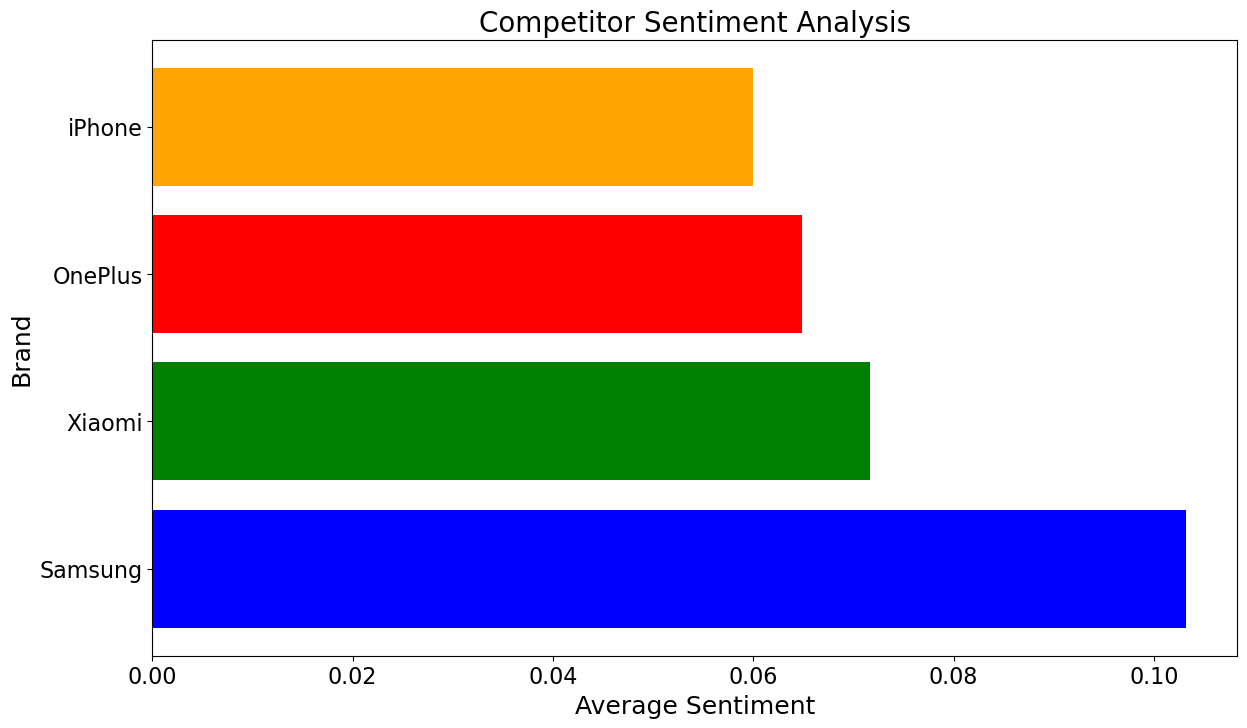

In [11]:
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Plot the horizontal bar plot with different colors for each brand
plt.barh(brand_sentiment['brand'], brand_sentiment['sentiment'], color=['blue', 'green', 'red', 'orange'])

# Set the labels and title with increased font size
plt.xlabel('Average Sentiment', fontsize=18)  # Increased font size for x-label
plt.ylabel('Brand', fontsize=18)  # Increased font size for y-label
plt.title('Competitor Sentiment Analysis', fontsize=20)  # Increased font size for title

# Increase the font size of the ticks for better visibility
plt.xticks(fontsize=16)  # Font size for x-ticks
plt.yticks(fontsize=16)  # Font size for y-ticks

# Show the plot
plt.show()